# Payment Matching Challenge Solution

In this notebook, we match the Bank Statement IDs to the Checkout IDs from data provided in competition page. We get some of working ideas in this notebook from file of another participant shared in competition page. 

Two criteria need to be met in order to match a bank statement with a checkout:
- **Amount match:** Statement amount equals checkout amount.
- **Name match:** Statement description “matches” checkout buyer name (Note: statement description usually contains buyer name)

**Challenge Objective:**
1. Match name and amount in the Bank Statement IDs to these in the Checkout IDs. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re # Regular Expression library in Python for text processing

## Importing Data and Their Early Exploration

In [2]:
bank_statement = pd.read_csv('bank_statement.csv')
checkout = pd.read_csv('checkout.csv')

**Note:** In this notebook, bank_statement dataframe is referred as statement data and checkout dataframe is referred as checkout data. 

In [3]:
print('Number of statement received:', len(bank_statement))
print('Bank statement list:')
bank_statement

Number of statement received: 240000
Bank statement list:


,stmt_id,stmt_amount,desc
0,1,100.00,INSTANT TRANSFER BAW CGANBAWI YIWHI * LEZC ...
1,2,23.77,WOOG CARIZA NIWSI YO
2,3,18.00,ZOMAZAW MABIX ATMA * BUGW * KZBUGW - TRANSFER...
3,4,21.87,TRANSFER GO LA/FA AHHA PUYIMA * YEBF ...
4,5,53.68,INSTANT TRANSFER FABZUN WIQAT JIW FA* TEGF ...
...,...,...,...
239995,239996,45.63,RV WC XUH AQLIXA GIXYI WAX
239996,239997,63.30,TRANSFER RO MA/BA EYEKIA AT GXAZMIB * YELB ...
239997,239998,9.76,INSTANT TRANSFER PUZ JATITI WJAJIZAJ* TEDW ...
239998,239999,145.00,WUVIJA XAJVISA FISD* SURWISZ POYER * AKSURWISZ...


In [4]:
print('Number of checkout received:', len(checkout))
print('Checkout list:')
checkout

Number of checkout received: 240000
Checkout list:


,ckt_id,ckt_amount,buyer_name
0,1,20.00,SAVMUEJICE EPHOCP
1,2,14.91,LUHALLAK ZGANFAP HAIQAW VIP LOHK. CIQTI
2,3,13.20,SUQ UNAISIE
3,4,36.90,GOZK BIHKAUT LIV LATAPI
4,7,26.29,HUY ZABIRAN HATIZAN WIHMI IRYIZ
...,...,...,...
239995,329026,15.00,VAQFILAPA JIPTI NORABI
239996,329027,70.39,JIQI CUWAIVAC FIBQI IFVACIW
239997,329030,35.08,MFAFHIYAB JIYVI MFAQMUTTIY
239998,329031,20.62,VAHID DUBRQAVIBA JH FOQL ANAD


## Process and Clean Data

In this stage, we clean buyer_name variable in checkout data into something can be more processed later. We also clean desc(ription) variable in statement data into something that look more readable and have more match elements with buyer_name variable.  

### Checkout Data

In [5]:
#1 Erase unnecessary character from checkout data
checkout.buyer_name = checkout.buyer_name.apply(lambda x: re.sub(r"[^a-zA-Z]+", ' ',x))

#2 Split word in buyer_name variable into list's element
checkout['buyer_name1'] = checkout.buyer_name.apply(lambda x:x.split())
checkout.head(20)

,ckt_id,ckt_amount,buyer_name,buyer_name1
0,1,20.00,SAVMUEJICE EPHOCP,"[SAVMUEJICE, EPHOCP]"
1,2,14.91,LUHALLAK ZGANFAP HAIQAW VIP LOHK CIQTI,"[LUHALLAK, ZGANFAP, HAIQAW, VIP, LOHK, CIQTI]"
2,3,13.20,SUQ UNAISIE,"[SUQ, UNAISIE]"
3,4,36.90,GOZK BIHKAUT LIV LATAPI,"[GOZK, BIHKAUT, LIV, LATAPI]"
4,7,26.29,HUY ZABIRAN HATIZAN WIHMI IRYIZ,"[HUY, ZABIRAN, HATIZAN, WIHMI, IRYIZ]"
5,8,23.94,WIL ZOOBP MEBP,"[WIL, ZOOBP, MEBP]"
6,10,62.73,RFEVQES JUASJ ASAB ANAS,"[RFEVQES, JUASJ, ASAB, ANAS]"
7,12,102.50,PAQZICIA ZOLE YOMISIC CVAS,"[PAQZICIA, ZOLE, YOMISIC, CVAS]"
8,13,25.40,GANIBAG,[GANIBAG]
9,15,9.77,ATIYUV WAUNIF,"[ATIYUV, WAUNIF]"


In [6]:
#3 Erase word that contain only one character
for i in checkout.index:
    for j in checkout['buyer_name1'][i]:
        if len(j)<2:
            checkout.loc[i,'buyer_name1'].remove(j)

In [7]:
#4 Count how many word of buyer_name and check if there is any data that doesn't have word in it
checkout['count_word'] = checkout['buyer_name1'].apply(lambda x:len(x))
display(checkout[checkout.count_word==0])

,ckt_id,ckt_amount,buyer_name,buyer_name1,count_word
124505,170633,41.84,,[],0


In [8]:
#4a Manipulate data by adding word to data that doesn't have word
checkout.loc[124505,'buyer_name1'].append('BETA')
checkout.loc[124505,'buyer_name1'].append('TESTER')

In [9]:
#4b Recheck
checkout['count_word'] = checkout['buyer_name1'].apply(lambda x:len(x))
display(checkout[checkout.count_word==0])

,ckt_id,ckt_amount,buyer_name,buyer_name1,count_word


In [10]:
checkout.head(20)

,ckt_id,ckt_amount,buyer_name,buyer_name1,count_word
0,1,20.00,SAVMUEJICE EPHOCP,"[SAVMUEJICE, EPHOCP]",2
1,2,14.91,LUHALLAK ZGANFAP HAIQAW VIP LOHK CIQTI,"[LUHALLAK, ZGANFAP, HAIQAW, VIP, LOHK, CIQTI]",6
2,3,13.20,SUQ UNAISIE,"[SUQ, UNAISIE]",2
3,4,36.90,GOZK BIHKAUT LIV LATAPI,"[GOZK, BIHKAUT, LIV, LATAPI]",4
4,7,26.29,HUY ZABIRAN HATIZAN WIHMI IRYIZ,"[HUY, ZABIRAN, HATIZAN, WIHMI, IRYIZ]",5
5,8,23.94,WIL ZOOBP MEBP,"[WIL, ZOOBP, MEBP]",3
6,10,62.73,RFEVQES JUASJ ASAB ANAS,"[RFEVQES, JUASJ, ASAB, ANAS]",4
7,12,102.50,PAQZICIA ZOLE YOMISIC CVAS,"[PAQZICIA, ZOLE, YOMISIC, CVAS]",4
8,13,25.40,GANIBAG,[GANIBAG],1
9,15,9.77,ATIYUV WAUNIF,"[ATIYUV, WAUNIF]",2


### Statement Data

In [11]:
#1 Erase unnecessary character from statement data
# Note that we need '/' character in this step and drop '/' character later
bank_statement.desc = bank_statement.desc.apply(lambda x: re.sub(r"[^a-zA-Z/]+", ' ',x))

Then we erase frequently words that often pop in desc variable. These words make noise that disturb in finding matching words between two data. Words we drop in desc variable are: **TRANSFER, INSTANT, FUNDS, SHOPEE, SAVINGS, A/C.** 

We erase these words by replacing these words with empty character (not a space character). We point some examples why we drop these words.

In [12]:
print("Example data that words 'INSTANT' and 'TRANSFER' are noise in finding match words:")
display(bank_statement[(bank_statement.stmt_id==45403)|(bank_statement.stmt_id==45438)])
display(checkout[(checkout.ckt_id==146639)|(checkout.ckt_id==157660)][['ckt_id','ckt_amount','buyer_name']])

print("Example data that words 'SHOPEE' is noise in finding match words:")
display(bank_statement[(bank_statement.stmt_id==37741)])
display(checkout[(checkout.ckt_id==183132)][['ckt_id','ckt_amount','buyer_name']])

print("Example data that words 'SAVINGS' is noise in finding match words:")
display(bank_statement[(bank_statement.stmt_id==19069)])
display(checkout[(checkout.ckt_id==313405)][['ckt_id','ckt_amount','buyer_name']])

print("Example data that words 'A/C' is noise in finding match words:")
display(bank_statement[(bank_statement.stmt_id==12493)])
display(checkout[(checkout.ckt_id==203465)][['ckt_id','ckt_amount','buyer_name']])

Example data that words 'INSTANT' and 'TRANSFER' are noise in finding match words:


,stmt_id,stmt_amount,desc
45402,45403,129.02,A INSTANT ZOUTRANSFERDEEQ BUFW
45437,45438,14.70,A INSTANT AKDTRANSFERUCC TADI


,ckt_id,ckt_amount,buyer_name
107056,146639,129.02,ZOUDEEQ BUFW
115098,157660,14.70,AKDUCC TADI


Example data that words 'SHOPEE' is noise in finding match words:


,stmt_id,stmt_amount,desc
37740,37741,0.01,TRANSFER BUDABBSHOPEEAW ZAUGAH ZIFY


,ckt_id,ckt_amount,buyer_name
133597,183132,0.01,BUDABBAW ZAUGAH ZIFYI XIH AXIWIH


Example data that words 'SAVINGS' is noise in finding match words:


,stmt_id,stmt_amount,desc
19068,19069,100.0,A INSTANT TOGFTRANSFER DSAVINGSIG CUG


,ckt_id,ckt_amount,buyer_name
228663,313405,100.0,TOGF DIG CUG


Example data that words 'A/C' is noise in finding match words:


,stmt_id,stmt_amount,desc
12492,12493,8.5,INF GARJEVS IVTO A/CBUJUSQA A/G ZAJAHAJ INF PI...


,ckt_id,ckt_amount,buyer_name
148476,203465,8.5,BUJUSQA A G ZAJAHAJR


In [13]:
#2 Erase frequently words that often pop in data. 
# These words make noise that disturb in finding matching words between two dataframe
bank_statement.desc = bank_statement.desc.apply(lambda x: re.sub(r"TRANSFER", '',x))
bank_statement.desc = bank_statement.desc.apply(lambda x: re.sub(r"INSTANT", '',x))
bank_statement.desc = bank_statement.desc.apply(lambda x: re.sub(r"FUNDS", '',x))
bank_statement.desc = bank_statement.desc.apply(lambda x: re.sub(r"SHOPEE", '',x))
bank_statement.desc = bank_statement.desc.apply(lambda x: re.sub(r"SAVINGS", '',x))
bank_statement.desc = bank_statement.desc.apply(lambda x: re.sub(r"A/C", '',x))

In [14]:
print('After reducing words in Desc variable that can disturb in finding matching buyer_name variable:')

print("Example data that words 'INSTANT' and 'TRANSFER' are noise in finding match words:")
display(bank_statement[(bank_statement.stmt_id==45403)|(bank_statement.stmt_id==45438)])
display(checkout[(checkout.ckt_id==146639)|(checkout.ckt_id==157660)][['ckt_id','ckt_amount','buyer_name']])

print("Example data that words 'SHOPEE' is noise in finding match words:")
display(bank_statement[(bank_statement.stmt_id==37741)])
display(checkout[(checkout.ckt_id==183132)][['ckt_id','ckt_amount','buyer_name']])

print("Example data that words 'SAVINGS' is noise in finding match words:")
display(bank_statement[(bank_statement.stmt_id==19069)])
display(checkout[(checkout.ckt_id==313405)][['ckt_id','ckt_amount','buyer_name']])

print("Example data that words 'A/C' is noise in finding match words:")
display(bank_statement[(bank_statement.stmt_id==12493)])
display(checkout[(checkout.ckt_id==203465)][['ckt_id','ckt_amount','buyer_name']])

After reducing words in Desc variable that can disturb in finding matching buyer_name variable:
Example data that words 'INSTANT' and 'TRANSFER' are noise in finding match words:


,stmt_id,stmt_amount,desc
45402,45403,129.02,A ZOUDEEQ BUFW
45437,45438,14.70,A AKDUCC TADI


,ckt_id,ckt_amount,buyer_name
107056,146639,129.02,ZOUDEEQ BUFW
115098,157660,14.70,AKDUCC TADI


Example data that words 'SHOPEE' is noise in finding match words:


,stmt_id,stmt_amount,desc
37740,37741,0.01,BUDABBAW ZAUGAH ZIFY


,ckt_id,ckt_amount,buyer_name
133597,183132,0.01,BUDABBAW ZAUGAH ZIFYI XIH AXIWIH


Example data that words 'SAVINGS' is noise in finding match words:


,stmt_id,stmt_amount,desc
19068,19069,100.0,A TOGF DIG CUG


,ckt_id,ckt_amount,buyer_name
228663,313405,100.0,TOGF DIG CUG


Example data that words 'A/C' is noise in finding match words:


,stmt_id,stmt_amount,desc
12492,12493,8.5,INF GARJEVS IVTO BUJUSQA A/G ZAJAHAJ INF PIA Z...


,ckt_id,ckt_amount,buyer_name
148476,203465,8.5,BUJUSQA A G ZAJAHAJR


In [15]:
#3 Split word in buyer_name variable into list's element
bank_statement['desc1'] = bank_statement.desc.apply(lambda x:x.split())

In [16]:
#4 Drop word that exactly 'TO', or contain only one character, or having '/' in it
# As pointed in example above, words having these criteria are not found in checkout data
for i in bank_statement.index:
    for j in bank_statement['desc1'][i]:
        if len(j)<2 or '/' in j or j=='TO':
            bank_statement.loc[i,'desc1'].remove(j)

In [17]:
bank_statement.loc[25:50,:]

,stmt_id,stmt_amount,desc,desc1
25,26,63.68,NSIZC WAGEZ JUZ AWGAA QIJCI BOMR,"[NSIZC, WAGEZ, JUZ, AWGAA, QIJCI, BOMR]"
26,27,46.21,IYA CAZISAC AYINIA UNAMSI FVIQOY AZUNAMSI FVIQOY,"[IYA, CAZISAC, AYINIA, UNAMSI, FVIQOY, AZUNAMS..."
27,28,20.02,GOKANBI A/J DOJAQAZ AK,"[GOKANBI, DOJAQAZ, AK]"
28,29,34.05,MIVI SKACA REI APJUS DUCJ YHDUCJ TO,"[MIVI, SKACA, REI, APJUS, DUCJ, YHDUCJ]"
29,30,15.44,A LUKALAP VKAIFUWAB IV,"[LUKALAP, VKAIFUWAB, IV]"
30,31,44.95,NIOYYIE MWIY SIE SI TELD FGA ATTELD FGA TO,"[NIOYYIE, MWIY, SIE, SI, TELD, FGA, ATTELD, FGA]"
31,32,50.00,VUIKAB WIJQ GUBXAGIZAXIFAX XUNA,"[VUIKAB, WIJQ, GUBXAGIZAXIFAX, XUNA]"
32,33,14.13,SUFVUTEFI GISTI AGQ VUTFIRLAK RLOOVE VADKEST V...,"[SUFVUTEFI, GISTI, AGQ, VUTFIRLAK, RLOOVE, VAD..."
33,34,46.00,K T ROQDAQIKA ICLIKA YIR,"[T, ROQDAQIKA, ICLIKA, YIR]"
34,35,60.90,LNN SY EPTI FUPBATIE NITYI NBPT ALNBPT,"[LNN, SY, EPTI, FUPBATIE, NITYI, NBPT, ALNBPT]"


The idea of changing variable type of desc and buyer_name variable from list to set come from cupu123's team. Set has method named intersection to list intersection between two sets. Also the idea sorting the data by amount is coming from them. The purpose is to get better data structure and enlighten the counting process. 

In [18]:
#5 Converting the description and buyer name to set type
bank_statement.desc1 = bank_statement.desc1.apply(lambda x: set(x))
checkout.buyer_name1 = checkout.buyer_name1.apply(lambda x: set(x))

In [19]:
#6 Sorting amount by value
bank_statement = bank_statement.sort_values(by=['stmt_amount'])
checkout = checkout.sort_values(by=['ckt_amount'])

We split the data based on how many word(s) in buyer name variable in checkout data. The aim of splitting checkout data is to reduce the time of finding match between statement and checkout data.

In [20]:
# Frequency of count_word before manipulating value counts
freq01 = checkout.count_word.value_counts().reset_index()
freq01.columns = ['count_word','frequency']

Text(0.5, 1.0, 'Word Count Frequency in Checkout Data Before Modification')

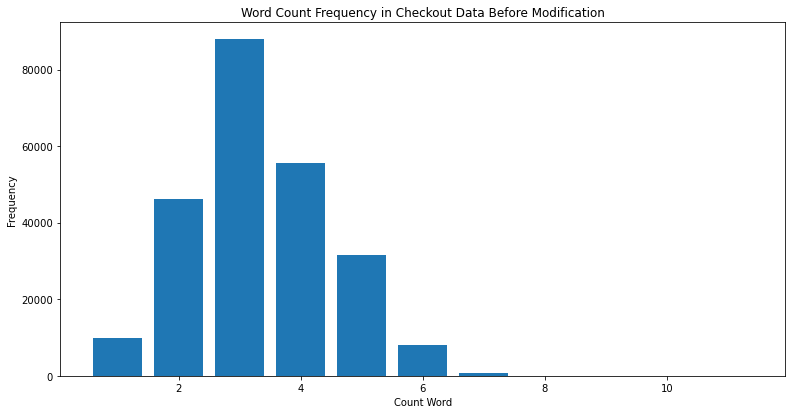

In [21]:
fig,ax = plt.subplots(figsize=(13,6.5))
plt.bar(x=freq01['count_word'],height=freq01['frequency'])
plt.xlabel('Count Word')
plt.ylabel('Frequency')
plt.title('Word Count Frequency in Checkout Data Before Modification')

In [22]:
# Manipulating count_word by merging data that have above 5 words to labeled as having 5 words
checkout['count_word'] = checkout['count_word'].replace([6,7,8,11],5) 

In [23]:
# Frequency of count_word after manipulating value counts
freq02 = checkout.count_word.value_counts().reset_index()
freq02.columns = ['count_word','frequency']

Text(0.5, 1.0, 'Word Count Frequency in Checkout Data After Modification')

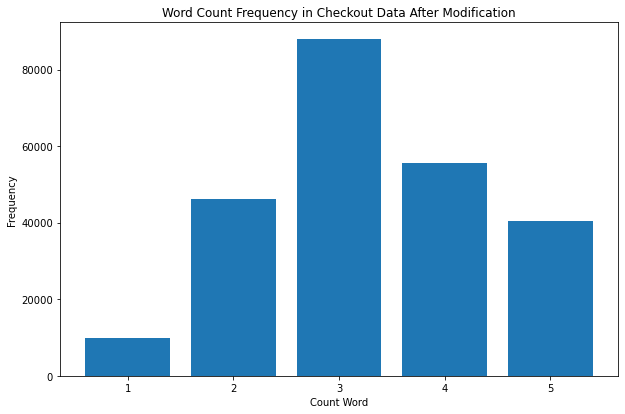

In [24]:
fig,ax = plt.subplots(figsize=(10,6.5))
plt.bar(x=freq02['count_word'],height=freq02['frequency'])
plt.xlabel('Count Word')
plt.ylabel('Frequency')
plt.title('Word Count Frequency in Checkout Data After Modification')

Based on frequency above, we are matching checkout data having 1, 5 (or more), 2, 4, and 3 words in order.

In [25]:
# Splitting checkout data
cn01 = checkout[checkout.count_word==1].drop('buyer_name',axis=1)
cn02 = checkout[checkout.count_word==2].drop('buyer_name',axis=1)
cn03 = checkout[checkout.count_word==3].drop('buyer_name',axis=1)
cn04 = checkout[checkout.count_word==4].drop('buyer_name',axis=1)
cn05 = checkout[checkout.count_word==5].drop('buyer_name',axis=1)

In [26]:
# Manipulate columns of checking data for merging purpose
cn01.columns = ['ckt_id','stmt_amount','buyer_name','count_word']
cn02.columns = ['ckt_id','stmt_amount','buyer_name','count_word']
cn03.columns = ['ckt_id','stmt_amount','buyer_name','count_word']
cn04.columns = ['ckt_id','stmt_amount','buyer_name','count_word']
cn05.columns = ['ckt_id','stmt_amount','buyer_name','count_word']

## Find CheckoutID Match with StatementID: Stage 1

**Strategy**

1. Match the amount between two data using merge.
   
2. Two possibility: 
    - (2A) When a checkout data has only one word, we consider a statement data matches with it if that word is also in statement data
    - (2B) When a checkout data has more than one word, we consider a statement data matches with it if there are at least two match words between checkout data and statement data

3. Collect checkout and statement data that not having their matches yet and repeat step 2B since we are doing one by one based on how many words on buyer_name variable, not simultaneous.

4. Collect checkout and statement data that not having their matches yet after repeating step 2B and process them later. 


We are showing examples why it neccessary having at least two match words for being consider a statemet data matches with a checkout data

In [27]:
display(bank_statement[(bank_statement.stmt_id==56094)|(bank_statement.stmt_id==91369)][['stmt_id','stmt_amount','desc']])
display(checkout[(checkout.ckt_id==151297)|(checkout.ckt_id==191331)][['ckt_id','ckt_amount','buyer_name']])

,stmt_id,stmt_amount,desc
91368,91369,16.13,DEYL QRANLJC DALFPUVIPAF SINQ DEYL QRA YDDEYL...
56093,56094,16.13,WASYIMAPA RIPLI JC JEHT LQA HJJEHT LQA TO


,ckt_id,ckt_amount,buyer_name
139616,191331,16.13,JC DALFPUVIPAF SINQI ASJ DAWIJ
110475,151297,16.13,WASYIMAPA JC MUTOW


In [28]:
display(bank_statement[(bank_statement.stmt_id==140206)|(bank_statement.stmt_id==167771)][['stmt_id','stmt_amount','desc']])
display(checkout[(checkout.ckt_id==120292)|(checkout.ckt_id==318608)][['ckt_id','ckt_amount','buyer_name']])

,stmt_id,stmt_amount,desc
167770,167771,50.0,YADCEM QIMJI RYAYAW YAMZQAK ABYAMZQAK
140205,140206,50.0,BADBUNIXANITA QIMJI RUML FDRUML TO


,ckt_id,ckt_amount,buyer_name
232454,318608,50.0,BADBUNIXANITAT QIMJI DAJ ANIRIM
87866,120292,50.0,YADCEM QIMJI RYAYAWI


We are matching statement data to checkout data having 1, 5, 2, 4, and 3 words in buyer_name in order. As we pointed some examples above:
1. **ckt_id 191331** should match with **stmt_id 91369** and **ckt_id 151297** should match with **stmt_id 56094**. If we consider it just need one match word, **ckt_id 191331** will be paired with **stmt_id 56094** and **ckt_id 151297** will be paired with **stmt_id 91369** since we do match five-words-buyer_name first than three-words-buyer_name.  
2. **ckt_id 120292** should match with **stmt_id 167771** and **ckt_id 318608** should match with **stmt_id 140206**. If we consider it just need one match word, **ckt_id 120292** will be paired with **stmt_id 140206** and **ckt_id 318608** will be paired with **stmt_id 167771** since we do match four-words-buyer_name first than three-words-buyer_name. We are matching ckt_id 318608 with stmt_id 140206 in next stage. 

### One Word in Buyer Name

In [29]:
merge01 = bank_statement.drop('desc',axis=1).merge(cn01,on='stmt_amount')
merge01

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word
0,161103,0.03,"{NIWZI, ANL, XAWABY, AFXAWABY, WUBJAWWAC}",253663,{WUBJAWWAC},1
1,32604,0.03,"{BY, ETU, WEPQUFE, YEJUJ}",253663,{WUBJAWWAC},1
2,116209,0.09,"{GSORR, ORR, SUJASSAY, YAFICJ, JAX}",27289,{CULTAYELLAD},1
3,134939,0.09,"{KEE, RIC, NIAXJ}",27289,{CULTAYELLAD},1
4,118452,0.09,"{NUI, VFUA, DRWFOD, YIAS, WFOD}",27289,{CULTAYELLAD},1
...,...,...,...,...,...,...
964582,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",261405,{NKOCWSAQQEE},1
964583,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",304559,{EHAVAWCUKI},1
964584,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",153115,{JULNTAFGIJA},1
964585,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",151124,{JUFRAJJAL},1


#### Test for Time Complexity

In [30]:
test01 = merge01[:3500].copy()
test01['irisan'] = [len(test01['buyer_name'][i].intersection(test01['desc1'][i])) for i in test01.index]
test01

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
0,161103,0.03,"{NIWZI, ANL, XAWABY, AFXAWABY, WUBJAWWAC}",253663,{WUBJAWWAC},1,1
1,32604,0.03,"{BY, ETU, WEPQUFE, YEJUJ}",253663,{WUBJAWWAC},1,0
2,116209,0.09,"{GSORR, ORR, SUJASSAY, YAFICJ, JAX}",27289,{CULTAYELLAD},1,0
3,134939,0.09,"{KEE, RIC, NIAXJ}",27289,{CULTAYELLAD},1,0
4,118452,0.09,"{NUI, VFUA, DRWFOD, YIAS, WFOD}",27289,{CULTAYELLAD},1,0
...,...,...,...,...,...,...,...
3495,175842,1.00,"{QADJ, LDAYUJNA, ZIKEZ, LY}",47371,{LIFAY},1,0
3496,175842,1.00,"{QADJ, LDAYUJNA, ZIKEZ, LY}",14330,{WAGKXKB},1,0
3497,175842,1.00,"{QADJ, LDAYUJNA, ZIKEZ, LY}",136337,{GANIPAD},1,0
3498,175842,1.00,"{QADJ, LDAYUJNA, ZIKEZ, LY}",96223,{VIDNMIFI},1,0


In [31]:
test01b = merge01[:15000].copy()
test01b['irisan'] = [len(test01b['buyer_name'][i].intersection(test01b['desc1'][i])) for i in test01b.index]
test01b

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
0,161103,0.03,"{NIWZI, ANL, XAWABY, AFXAWABY, WUBJAWWAC}",253663,{WUBJAWWAC},1,1
1,32604,0.03,"{BY, ETU, WEPQUFE, YEJUJ}",253663,{WUBJAWWAC},1,0
2,116209,0.09,"{GSORR, ORR, SUJASSAY, YAFICJ, JAX}",27289,{CULTAYELLAD},1,0
3,134939,0.09,"{KEE, RIC, NIAXJ}",27289,{CULTAYELLAD},1,0
4,118452,0.09,"{NUI, VFUA, DRWFOD, YIAS, WFOD}",27289,{CULTAYELLAD},1,0
...,...,...,...,...,...,...,...
14995,99419,6.95,"{KAUZMYET, EPBYEXX, BXW}",129927,{CAURWANLFEPR},1,0
14996,226278,6.95,"{TUDUN, QITVI, ASMTITA}",129927,{CAURWANLFEPR},1,0
14997,196993,6.95,"{SEJG, NIJRI, BF, HABIYA}",129927,{CAURWANLFEPR},1,0
14998,181631,6.95,"{GECF, AGGECF, QOZRIKAYASI, HIQSI, SZA}",129927,{CAURWANLFEPR},1,0


#### Find Data Having Intersection

In [32]:
merge01['irisan'] = [len(merge01['buyer_name'][i].intersection(merge01['desc1'][i])) for i in merge01.index]
merge01

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
0,161103,0.03,"{NIWZI, ANL, XAWABY, AFXAWABY, WUBJAWWAC}",253663,{WUBJAWWAC},1,1
1,32604,0.03,"{BY, ETU, WEPQUFE, YEJUJ}",253663,{WUBJAWWAC},1,0
2,116209,0.09,"{GSORR, ORR, SUJASSAY, YAFICJ, JAX}",27289,{CULTAYELLAD},1,0
3,134939,0.09,"{KEE, RIC, NIAXJ}",27289,{CULTAYELLAD},1,0
4,118452,0.09,"{NUI, VFUA, DRWFOD, YIAS, WFOD}",27289,{CULTAYELLAD},1,0
...,...,...,...,...,...,...,...
964582,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",261405,{NKOCWSAQQEE},1,0
964583,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",304559,{EHAVAWCUKI},1,0
964584,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",153115,{JULNTAFGIJA},1,0
964585,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",151124,{JUFRAJJAL},1,0


In [33]:
result01 = merge01[merge01.irisan==1][['stmt_id','stmt_amount','ckt_id','irisan']].reset_index(drop=True)
result01

,stmt_id,stmt_amount,ckt_id,irisan
0,161103,0.03,253663,1
1,115988,0.09,27289,1
2,36823,0.10,228627,1
3,105556,0.10,31601,1
4,86140,0.10,243663,1
...,...,...,...,...
7738,55117,199.94,198895,1
7739,19559,200.00,151124,1
7740,177348,200.00,209707,1
7741,223018,200.00,24076,1


In [34]:
print('Number of matched data retrieved with one word in buyer_name:',len(result01))
print('Number of unique pair:',result01.stmt_id.nunique(),result01.ckt_id.nunique())

Number of matched data retrieved with one word in buyer_name: 7743
Number of unique pair: 7743 7743


### Five Words in Buyer Name

In [36]:
# Remaining Statement Data
bank_sta05a = bank_statement.drop('desc',axis=1).merge(result01[['stmt_id','stmt_amount','ckt_id']],on=['stmt_id','stmt_amount'],how='left')
bank_sta05 = bank_sta05a[bank_sta05a.ckt_id.isnull()].drop('ckt_id',axis=1)
bank_sta05

,stmt_id,stmt_amount,desc1
0,37741,0.01,"{BUDABBAW, ZAUGAH, ZIFY}"
1,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}"
2,226725,0.01,"{WOK, PAQB, PEE}"
3,230964,0.01,"{FAWXANAH, VUQINR, NOL, GOFONR, WAQIN, VTVUQINR}"
4,115858,0.01,"{CIBKI, NG, ACP, CLA, BULVIBJ, IBAXILAY}"
...,...,...,...
239995,120229,200.00,"{YIG, XEHW, HXXEHW, FKA, UYAIWC, XOCAXEM}"
239996,89249,200.00,"{DIJAG, LUTB, WIT, KAZAT, RNLUTB}"
239997,233693,200.00,"{LISAQ, SHHEJA, YIW, HEJA, HOKAH, WOXGFAMIT}"
239998,33980,200.00,"{ZAIWAYI, QIYJI, GAZRI, XBZAIWAYI}"


In [37]:
merge05 = bank_sta05.merge(cn05,on='stmt_amount')
merge05

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word
0,37741,0.01,"{BUDABBAW, ZAUGAH, ZIFY}",183132,"{ZIFYI, ZAUGAH, BUDABBAW, XIH, AXIWIH}",5
1,37741,0.01,"{BUDABBAW, ZAUGAH, ZIFY}",127069,"{FAWXANAH, ZINQI, NOL, AXAKUSIN, WAQIN}",5
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",183132,"{ZIFYI, ZAUGAH, BUDABBAW, XIH, AXIWIH}",5
3,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",127069,"{FAWXANAH, ZINQI, NOL, AXAKUSIN, WAQIN}",5
4,226725,0.01,"{WOK, PAQB, PEE}",183132,"{ZIFYI, ZAUGAH, BUDABBAW, XIH, AXIWIH}",5
...,...,...,...,...,...,...
3748878,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",327253,"{NUVOM, QIF, BHAHWUT, KOHV, FIGAK}",5
3748879,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",6806,"{PEYTI, AJM, WAXIZ, JIR, XAILUY}",5
3748880,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",72108,"{PIQYI, COF, QODCUNASSAF, WFE}",5
3748881,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",769,"{ZADYAS, ZADHIAZ, KQ, SOHMAIDDAQUG, YOZW}",5


#### Test for Time Complexity

In [38]:
test05a = merge05[:5000].copy()
test05a['irisan'] = [len(test05a['buyer_name'][i].intersection(test05a['desc1'][i])) for i in test05a.index]
test05a

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
0,37741,0.01,"{BUDABBAW, ZAUGAH, ZIFY}",183132,"{ZIFYI, ZAUGAH, BUDABBAW, XIH, AXIWIH}",5,2
1,37741,0.01,"{BUDABBAW, ZAUGAH, ZIFY}",127069,"{FAWXANAH, ZINQI, NOL, AXAKUSIN, WAQIN}",5,0
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",183132,"{ZIFYI, ZAUGAH, BUDABBAW, XIH, AXIWIH}",5,0
3,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",127069,"{FAWXANAH, ZINQI, NOL, AXAKUSIN, WAQIN}",5,0
4,226725,0.01,"{WOK, PAQB, PEE}",183132,"{ZIFYI, ZAUGAH, BUDABBAW, XIH, AXIWIH}",5,0
...,...,...,...,...,...,...,...
4995,26887,0.60,"{XIV, LG, GOTAGAW, VAHIM}",136471,"{WAHAW, GATIYI, XIW, TOZR}",5,0
4996,26887,0.60,"{XIV, LG, GOTAGAW, VAHIM}",216860,"{YUW, AR, LKUZIAD, WAXAP, LIMI, RM}",5,0
4997,26887,0.60,"{XIV, LG, GOTAGAW, VAHIM}",139788,"{AMICAK, DINSI, ZAAWJIN, GQAWA, NUZUC}",5,0
4998,26887,0.60,"{XIV, LG, GOTAGAW, VAHIM}",301844,"{OGAN, SAIMAK, AWIQIM, GURAGGAQ, WIM}",5,0


In [39]:
test05b = merge05[5000:20000].copy()
test05b['irisan'] = [len(test05b['buyer_name'][i].intersection(test05b['desc1'][i])) for i in test05b.index]
test05b

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
5000,26887,0.6,"{XIV, LG, GOTAGAW, VAHIM}",182555,"{KOSQ, ASKAQ, NOJQIN, AVSAK, DIN}",5,0
5001,26887,0.6,"{XIV, LG, GOTAGAW, VAHIM}",164513,"{VITLI, VAJAC, AVU, DUCIATI, ITLAT}",5,0
5002,118381,0.6,"{YUM, SUX, JIYQI, ANUMA, LS}",136471,"{WAHAW, GATIYI, XIW, TOZR}",5,0
5003,118381,0.6,"{YUM, SUX, JIYQI, ANUMA, LS}",216860,"{YUW, AR, LKUZIAD, WAXAP, LIMI, RM}",5,0
5004,118381,0.6,"{YUM, SUX, JIYQI, ANUMA, LS}",139788,"{AMICAK, DINSI, ZAAWJIN, GQAWA, NUZUC}",5,0
...,...,...,...,...,...,...,...
19995,193698,1.0,"{LUHIWAP, NO, BIHNI, AWIHA}",110707,"{XIS, FAKIJ, AQTOS, AITAS, TUYATTAC}",5,0
19996,193698,1.0,"{LUHIWAP, NO, BIHNI, AWIHA}",116391,"{CAQGUG, GUD, HIGTI, QAIZULLIG, QAYIEGAC}",5,0
19997,193698,1.0,"{LUHIWAP, NO, BIHNI, AWIHA}",22629,"{XUH, JPIFA, JIFEV, CAJLA, AZF, ZK, HADNAX}",5,0
19998,193698,1.0,"{LUHIWAP, NO, BIHNI, AWIHA}",56443,"{VIB, DOSJ, NADWI, PORESAB}",5,0


In [40]:
test05c = merge05[20000:45000].copy()
test05c['irisan'] = [len(test05c['buyer_name'][i].intersection(test05c['desc1'][i])) for i in test05c.index]
test05c

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
20000,193698,1.0,"{LUHIWAP, NO, BIHNI, AWIHA}",113919,"{AFYUW, CUJUW, IRRALUW, SAWIV, AGVAWW, FICLI}",5,0
20001,193698,1.0,"{LUHIWAP, NO, BIHNI, AWIHA}",200313,"{MIJRI, ALVAF, JULUS, VYAAFAY, ZOYF}",5,0
20002,193698,1.0,"{LUHIWAP, NO, BIHNI, AWIHA}",206572,"{XUKWAZFA, VW, XIGLADA, DIJ, AGDI}",5,0
20003,193698,1.0,"{LUHIWAP, NO, BIHNI, AWIHA}",271531,"{PAIL, FURAFFAV, YALAK, SID, FORV}",5,0
20004,193698,1.0,"{LUHIWAP, NO, BIHNI, AWIHA}",66565,"{IHTAVIR, ANICAV, HIGNI, JINI, GUT}",5,0
...,...,...,...,...,...,...,...
44995,221176,5.0,"{MIWEWF, INAWI, XOGAXAS, BALXI}",188513,"{YIQ, MUSAMMAL, ML, ROLWI, GUXMAY}",5,0
44996,221176,5.0,"{MIWEWF, INAWI, XOGAXAS, BALXI}",36406,"{HURROSS, BACXGIAG, CAIGAZ, BOGX, DIZNI}",5,0
44997,221176,5.0,"{MIWEWF, INAWI, XOGAXAS, BALXI}",246314,"{HIGWI, AGUAD, ZALSOD, GUDUY, ABIYAS}",5,0
44998,221176,5.0,"{MIWEWF, INAWI, XOGAXAS, BALXI}",31704,"{ROYG, RUYARRAG, ZAIN, DIF, SANAJ}",5,0


#### Find Data Having Intersection

In [41]:
merge05['irisan'] = [len(merge05['buyer_name'][i].intersection(merge05['desc1'][i])) for i in merge05.index]
merge05

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
0,37741,0.01,"{BUDABBAW, ZAUGAH, ZIFY}",183132,"{ZIFYI, ZAUGAH, BUDABBAW, XIH, AXIWIH}",5,2
1,37741,0.01,"{BUDABBAW, ZAUGAH, ZIFY}",127069,"{FAWXANAH, ZINQI, NOL, AXAKUSIN, WAQIN}",5,0
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",183132,"{ZIFYI, ZAUGAH, BUDABBAW, XIH, AXIWIH}",5,0
3,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",127069,"{FAWXANAH, ZINQI, NOL, AXAKUSIN, WAQIN}",5,0
4,226725,0.01,"{WOK, PAQB, PEE}",183132,"{ZIFYI, ZAUGAH, BUDABBAW, XIH, AXIWIH}",5,0
...,...,...,...,...,...,...,...
3748878,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",327253,"{NUVOM, QIF, BHAHWUT, KOHV, FIGAK}",5,0
3748879,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",6806,"{PEYTI, AJM, WAXIZ, JIR, XAILUY}",5,0
3748880,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",72108,"{PIQYI, COF, QODCUNASSAF, WFE}",5,0
3748881,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",769,"{ZADYAS, ZADHIAZ, KQ, SOHMAIDDAQUG, YOZW}",5,0


In [42]:
result05 = merge05[merge05.irisan>1][['stmt_id','stmt_amount','ckt_id','irisan']].sort_values('irisan').reset_index(drop=True)
result05

,stmt_id,stmt_amount,ckt_id,irisan
0,37741,0.01,183132,2
1,223922,64.90,76915,2
2,97607,64.90,272897,2
3,211815,20.60,219396,2
4,178721,64.90,257848,2
...,...,...,...,...
39882,121813,13.15,285223,5
39883,40236,63.75,91754,5
39884,154489,10.57,320429,6
39885,133600,97.30,155783,6


**Note:** We are creating matching result by sorting how many intersection of words that statement and checkout data have. When there are duplication in statement or checkout identity stored in result, we keep matching result having the most intersection and drop otherwise.  

#### Find Data Having Duplicates Identity from Result

In [43]:
print('Number of matched data retrieved with five or more words in buyer_name:',len(result05))
print('Number of unique pair:',result05.stmt_id.nunique(),result05.ckt_id.nunique())

Number of matched data retrieved with five or more words in buyer_name: 39887
Number of unique pair: 39885 39884


Since the matched data has different number with unique statement and checkout identity, there are duplicate data we should drop.

In [44]:
result05.stmt_id.value_counts()

101939    2
89884     2
67583     1
117318    1
238910    1
         ..
107509    1
127691    1
125640    1
168647    1
214751    1
Name: stmt_id, Length: 39885, dtype: int64

In [45]:
result05.ckt_id.value_counts()

172138    2
122981    2
291326    2
263530    1
320886    1
         ..
250543    1
75853     1
182956    1
46715     1
67585     1
Name: ckt_id, Length: 39884, dtype: int64

In [46]:
display(result05[(result05.stmt_id==101939)|(result05.stmt_id==89884)])
display(result05[(result05.ckt_id==172138)|(result05.ckt_id==122981)|(result05.ckt_id==291326)])

,stmt_id,stmt_amount,ckt_id,irisan
4013,101939,40.04,122981,2
4022,89884,40.04,291326,2
11335,89884,40.04,122981,3
37002,101939,40.04,291326,4


,stmt_id,stmt_amount,ckt_id,irisan
2283,47804,18.13,172138,2
4013,101939,40.04,122981,2
4022,89884,40.04,291326,2
11335,89884,40.04,122981,3
37002,101939,40.04,291326,4
39263,175011,18.13,172138,4


#### Drop Duplicates Identity from Result and Compare

In [47]:
result05.drop_duplicates(subset='ckt_id',keep='last',inplace=True)
result05.drop_duplicates(subset='stmt_id',keep='last',inplace=True)

In [48]:
display(result05[(result05.stmt_id==101939)|(result05.stmt_id==89884)])
display(result05[(result05.ckt_id==172138)|(result05.ckt_id==122981)|(result05.ckt_id==291326)])

,stmt_id,stmt_amount,ckt_id,irisan
11335,89884,40.04,122981,3
37002,101939,40.04,291326,4


,stmt_id,stmt_amount,ckt_id,irisan
11335,89884,40.04,122981,3
37002,101939,40.04,291326,4
39263,175011,18.13,172138,4


In [49]:
result05

,stmt_id,stmt_amount,ckt_id,irisan
0,37741,0.01,183132,2
1,223922,64.90,76915,2
2,97607,64.90,272897,2
3,211815,20.60,219396,2
4,178721,64.90,257848,2
...,...,...,...,...
39882,121813,13.15,285223,5
39883,40236,63.75,91754,5
39884,154489,10.57,320429,6
39885,133600,97.30,155783,6


### Two Words in Buyer Name

In [50]:
# Remaining Statement Data
bank_sta02a = bank_sta05.merge(result05[['stmt_id','stmt_amount','ckt_id']],on=['stmt_id','stmt_amount'],how='left')
bank_sta02 = bank_sta02a[bank_sta02a.ckt_id.isnull()].drop('ckt_id',axis=1)
bank_sta02

,stmt_id,stmt_amount,desc1
1,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}"
2,226725,0.01,"{WOK, PAQB, PEE}"
4,115858,0.01,"{CIBKI, NG, ACP, CLA, BULVIBJ, IBAXILAY}"
5,57354,0.01,"{NAMH, SIZ, AWNAMH, SAJTUY, HIMHAW}"
6,39781,0.01,"{MIKSI, PRXAI, GIK, KOOVAWYIXIK, XAI}"
...,...,...,...
232252,120229,200.00,"{YIG, XEHW, HXXEHW, FKA, UYAIWC, XOCAXEM}"
232253,89249,200.00,"{DIJAG, LUTB, WIT, KAZAT, RNLUTB}"
232254,233693,200.00,"{LISAQ, SHHEJA, YIW, HEJA, HOKAH, WOXGFAMIT}"
232255,33980,200.00,"{ZAIWAYI, QIYJI, GAZRI, XBZAIWAYI}"


In [51]:
merge02 = bank_sta02.merge(cn02,on='stmt_amount')
merge02

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word
0,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",273052,"{ZEHITOSO, SASASQ}",2
1,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",216111,"{MOLT, BAJIAB}",2
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",227279,"{WUVUS, PAMIXAX}",2
3,226725,0.01,"{WOK, PAQB, PEE}",273052,"{ZEHITOSO, SASASQ}",2
4,226725,0.01,"{WOK, PAQB, PEE}",216111,"{MOLT, BAJIAB}",2
...,...,...,...,...,...,...
3517271,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",107925,"{WJOFAL, AZALWALIA}",2
3517272,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",171945,"{POH, LIJASAWI}",2
3517273,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",81122,"{QUJUX, NKULAGA}",2
3517274,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",137964,"{HADIEAG, SUWASSAH}",2


#### Test for Time Complexity

In [52]:
test02a = merge02[:5000].copy()
test02a['irisan'] = [len(test02a['buyer_name'][i].intersection(test02a['desc1'][i])) for i in test02a.index]
test02a

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
0,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",273052,"{ZEHITOSO, SASASQ}",2,0
1,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",216111,"{MOLT, BAJIAB}",2,0
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",227279,"{WUVUS, PAMIXAX}",2,0
3,226725,0.01,"{WOK, PAQB, PEE}",273052,"{ZEHITOSO, SASASQ}",2,0
4,226725,0.01,"{WOK, PAQB, PEE}",216111,"{MOLT, BAJIAB}",2,0
...,...,...,...,...,...,...,...
4995,33154,0.90,"{JXAYIH, AMTUZR, TUZR, AZVAY, PIZ, MOX}",113254,"{VOKIBAVXI, VUCUL}",2,0
4996,33154,0.90,"{JXAYIH, AMTUZR, TUZR, AZVAY, PIZ, MOX}",136280,"{AHIKAW, KWAIGINA}",2,0
4997,33154,0.90,"{JXAYIH, AMTUZR, TUZR, AZVAY, PIZ, MOX}",79136,"{JIJA, PAIPHA}",2,0
4998,33154,0.90,"{JXAYIH, AMTUZR, TUZR, AZVAY, PIZ, MOX}",322317,"{HUMIATA, HAIT}",2,0


In [53]:
test02b = merge02[5000:20000].copy()
test02b['irisan'] = [len(test02b['buyer_name'][i].intersection(test02b['desc1'][i])) for i in test02b.index]
test02b

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
5000,33154,0.90,"{JXAYIH, AMTUZR, TUZR, AZVAY, PIZ, MOX}",327665,"{AICRAL, CIGI}",2,0
5001,33154,0.90,"{JXAYIH, AMTUZR, TUZR, AZVAY, PIZ, MOX}",29207,"{SEC, FDUKIAG}",2,0
5002,33154,0.90,"{JXAYIH, AMTUZR, TUZR, AZVAY, PIZ, MOX}",126299,"{QH, AWUMGWABB}",2,0
5003,202788,0.91,"{ROTARRAP, SIK, CIZLI}",71772,"{VUHIZA, NAHIW}",2,0
5004,202788,0.91,"{ROTARRAP, SIK, CIZLI}",52253,"{SANWOB, SALINA}",2,0
...,...,...,...,...,...,...,...
19995,22780,1.00,"{PAIFAH, NIFWI, PEEWA, SOBJAY}",288219,"{AFIZA, QUZ}",2,0
19996,22780,1.00,"{PAIFAH, NIFWI, PEEWA, SOBJAY}",212484,"{WOPQZ, TAITUGAK}",2,0
19997,22780,1.00,"{PAIFAH, NIFWI, PEEWA, SOBJAY}",92152,"{MOQAMAX, PAQIEMIE}",2,0
19998,22780,1.00,"{PAIFAH, NIFWI, PEEWA, SOBJAY}",216766,"{HOYWAM, YOTIAL}",2,0


In [54]:
test02c = merge02[20000:45000].copy()
test02c['irisan'] = [len(test02c['buyer_name'][i].intersection(test02c['desc1'][i])) for i in test02c.index]
test02c

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
20000,22780,1.0,"{PAIFAH, NIFWI, PEEWA, SOBJAY}",141802,"{AVILUD, AGTLASS}",2,0
20001,22780,1.0,"{PAIFAH, NIFWI, PEEWA, SOBJAY}",183716,"{CEXPI, YAUTI}",2,0
20002,22780,1.0,"{PAIFAH, NIFWI, PEEWA, SOBJAY}",29755,"{ZUXAZAG, XINDAZ}",2,0
20003,22780,1.0,"{PAIFAH, NIFWI, PEEWA, SOBJAY}",186000,"{CIPFI, PAHQAZOH}",2,0
20004,22780,1.0,"{PAIFAH, NIFWI, PEEWA, SOBJAY}",312772,"{HILA, KEXLANI}",2,0
...,...,...,...,...,...,...,...
44995,133876,4.8,"{VFAJEMEBXEFHEWHMIPEF, VIN, HBIAX, TORD, EFRAN}",99923,"{GUQUCAGP, GADMADEY}",2,0
44996,133876,4.8,"{VFAJEMEBXEFHEWHMIPEF, VIN, HBIAX, TORD, EFRAN}",144328,"{VAIMAT, BUVABBAQ}",2,0
44997,133876,4.8,"{VFAJEMEBXEFHEWHMIPEF, VIN, HBIAX, TORD, EFRAN}",144259,"{MODX, WAZRI}",2,0
44998,133876,4.8,"{VFAJEMEBXEFHEWHMIPEF, VIN, HBIAX, TORD, EFRAN}",48876,"{ANJAS, GAZIJ}",2,0


#### Find Data Having Intersection

In [55]:
merge02['irisan'] = [len(merge02['buyer_name'][i].intersection(merge02['desc1'][i])) for i in merge02.index]
merge02

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
0,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",273052,"{ZEHITOSO, SASASQ}",2,0
1,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",216111,"{MOLT, BAJIAB}",2,0
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",227279,"{WUVUS, PAMIXAX}",2,0
3,226725,0.01,"{WOK, PAQB, PEE}",273052,"{ZEHITOSO, SASASQ}",2,0
4,226725,0.01,"{WOK, PAQB, PEE}",216111,"{MOLT, BAJIAB}",2,0
...,...,...,...,...,...,...,...
3517271,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",107925,"{WJOFAL, AZALWALIA}",2,0
3517272,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",171945,"{POH, LIJASAWI}",2,0
3517273,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",81122,"{QUJUX, NKULAGA}",2,0
3517274,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",137964,"{HADIEAG, SUWASSAH}",2,0


In [56]:
result02 = merge02[merge02.irisan>1][['stmt_id','stmt_amount','ckt_id','irisan']].sort_values('irisan').reset_index(drop=True)
result02

,stmt_id,stmt_amount,ckt_id,irisan
0,131900,0.01,216111,2
1,118806,50.91,286160,2
2,198879,50.91,200645,2
3,124915,50.91,134534,2
4,209288,50.91,73395,2
...,...,...,...,...
35483,132692,23.65,1590,2
35484,50923,23.65,289434,2
35485,192420,23.65,171061,2
35486,172248,23.64,15325,2


#### Check If There is Any Duplicate Identity from Result

In [57]:
print('Number of matched data retrieved with two words in buyer_name:',len(result02))
print('Number of unique pair:',result02.stmt_id.nunique(), result02.ckt_id.nunique())

Number of matched data retrieved with two words in buyer_name: 35488
Number of unique pair: 35488 35488


Since the matched data has same number with unique identity, there is no duplicate data we should worry.

### Four Words in Buyer Name

In [58]:
# Remaining Statement Data
bank_sta04a = bank_sta02.merge(result02[['stmt_id','stmt_amount','ckt_id']],on=['stmt_id','stmt_amount'],how='left')
bank_sta04 = bank_sta04a[bank_sta04a.ckt_id.isnull()].drop('ckt_id',axis=1)
bank_sta04

,stmt_id,stmt_amount,desc1
0,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}"
1,226725,0.01,"{WOK, PAQB, PEE}"
2,115858,0.01,"{CIBKI, NG, ACP, CLA, BULVIBJ, IBAXILAY}"
3,57354,0.01,"{NAMH, SIZ, AWNAMH, SAJTUY, HIMHAW}"
4,39781,0.01,"{MIKSI, PRXAI, GIK, KOOVAWYIXIK, XAI}"
...,...,...,...
192368,120229,200.00,"{YIG, XEHW, HXXEHW, FKA, UYAIWC, XOCAXEM}"
192369,89249,200.00,"{DIJAG, LUTB, WIT, KAZAT, RNLUTB}"
192370,233693,200.00,"{LISAQ, SHHEJA, YIW, HEJA, HOKAH, WOXGFAMIT}"
192371,33980,200.00,"{ZAIWAYI, QIYJI, GAZRI, XBZAIWAYI}"


In [59]:
merge04 = bank_sta04.merge(cn04,on='stmt_amount')
merge04

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word
0,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",95499,"{ZIDGI, DUX, RUWVICWI, RAMAXADI}",4
1,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",281850,"{WIXDI, NAAQAT, XUT, QADBIBA}",4
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",285819,"{LIBKI, IHABI, BUV, AKIQAZ}",4
3,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",2386,"{WACLI, VOBC, GATIBAB, QIGYI}",4
4,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",298747,"{LOQ, MILZI, YOGT, LOQFANENNA}",4
...,...,...,...,...,...,...
3446057,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",138902,"{QUJ, NIQMI, ALARIQA, IXLAIR}",4
3446058,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",200841,"{IYUAKI, IDSAVIM, DIKBI, KOS}",4
3446059,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",127565,"{LATIEAH, QAPGALI, QAZIK, VOQL}",4
3446060,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",296409,"{HOG, DARGAH, VAISAH, RIHJI}",4


#### Test for Time Complexity

In [60]:
test04a = merge04[:5000].copy()
test04a['irisan'] = [len(test04a['buyer_name'][i].intersection(test04a['desc1'][i])) for i in test04a.index]
test04a

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
0,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",95499,"{ZIDGI, DUX, RUWVICWI, RAMAXADI}",4,0
1,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",281850,"{WIXDI, NAAQAT, XUT, QADBIBA}",4,0
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",285819,"{LIBKI, IHABI, BUV, AKIQAZ}",4,0
3,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",2386,"{WACLI, VOBC, GATIBAB, QIGYI}",4,0
4,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",298747,"{LOQ, MILZI, YOGT, LOQFANENNA}",4,0
...,...,...,...,...,...,...,...
4995,26887,0.60,"{XIV, LG, GOTAGAW, VAHIM}",227802,"{FIWI, CYAITAJI, JASAIJI, LIJWI}",4,0
4996,26887,0.60,"{XIV, LG, GOTAGAW, VAHIM}",318082,"{PIW, TIPPIE, EPQIA, PEHIWA}",4,0
4997,118381,0.60,"{YUM, SUX, JIYQI, ANUMA, LS}",267624,"{CKAQYUB, MQAIYI, WIS, SAVIH}",4,0
4998,118381,0.60,"{YUM, SUX, JIYQI, ANUMA, LS}",159641,"{JIQ, FAYCAQ, KACAJ, ALIF}",4,0


In [61]:
test04b = merge04[5000:20000].copy()
test04b['irisan'] = [len(test04b['buyer_name'][i].intersection(test04b['desc1'][i])) for i in test04b.index]
test04b

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
5000,118381,0.6,"{YUM, SUX, JIYQI, ANUMA, LS}",197382,"{QIGNI, NAXIF, WAXKAGA, GOC}",4,0
5001,118381,0.6,"{YUM, SUX, JIYQI, ANUMA, LS}",88093,"{JANI, RIZQI, WAYNAF, YAQ}",4,0
5002,118381,0.6,"{YUM, SUX, JIYQI, ANUMA, LS}",227643,"{XIV, VACEMI, GOTAGAW, VAHIM}",4,0
5003,118381,0.6,"{YUM, SUX, JIYQI, ANUMA, LS}",227802,"{FIWI, CYAITAJI, JASAIJI, LIJWI}",4,0
5004,118381,0.6,"{YUM, SUX, JIYQI, ANUMA, LS}",318082,"{PIW, TIPPIE, EPQIA, PEHIWA}",4,0
...,...,...,...,...,...,...,...
19995,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",114398,"{XOFAXAW, VONFAIWA, LANAVI, LIPDI}",4,0
19996,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",298014,"{VIDI, RUG, QIA, LAIVAGAC}",4,0
19997,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",111863,"{LAWWAD, DOOP, LIMAQAF}",4,0
19998,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",294170,"{BIR, VUHAVVAN, AQIAD, DZAHIT}",4,0


In [62]:
test04c = merge04[20000:45000].copy()
test04c['irisan'] = [len(test04c['buyer_name'][i].intersection(test04c['desc1'][i])) for i in test04c.index]
test04c

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
20000,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",120945,"{WMASI, WLACIHIP, BJ, PATAJUX}",4,0
20001,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",33441,"{RANIZIE, VIC, IVNAJID, ARZI}",4,0
20002,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",195689,"{AFIVA, IWPAG, CIGJI, FIFI}",4,0
20003,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",202181,"{XUW, PAXI, NAWAMAIXI, HIXJI}",4,0
20004,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",239621,"{ASAJ, SID, PONT, AJPATX}",4,0
...,...,...,...,...,...,...,...
44995,61565,5.8,"{NKXZOONE, GIFH, XAFREB, FUSBIDAFA, XZOONE, XIHI}",249337,"{COXN, XIWCE, QIP, XULIP}",4,0
44996,61565,5.8,"{NKXZOONE, GIFH, XAFREB, FUSBIDAFA, XZOONE, XIHI}",183490,"{WOGAWAV, JIB, GAPIR, RGAQIB}",4,0
44997,61565,5.8,"{NKXZOONE, GIFH, XAFREB, FUSBIDAFA, XZOONE, XIHI}",234987,"{DISYI, MABLAS, ETGA, BIYI}",4,0
44998,61565,5.8,"{NKXZOONE, GIFH, XAFREB, FUSBIDAFA, XZOONE, XIHI}",287381,"{HAIBI, MIVLI, ROHIGA, NOYB}",4,0


#### Find Data Having Intersection

In [63]:
merge04['irisan'] = [len(merge04['buyer_name'][i].intersection(merge04['desc1'][i])) for i in merge04.index]
merge04  

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
0,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",95499,"{ZIDGI, DUX, RUWVICWI, RAMAXADI}",4,0
1,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",281850,"{WIXDI, NAAQAT, XUT, QADBIBA}",4,0
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",285819,"{LIBKI, IHABI, BUV, AKIQAZ}",4,0
3,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",2386,"{WACLI, VOBC, GATIBAB, QIGYI}",4,0
4,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",298747,"{LOQ, MILZI, YOGT, LOQFANENNA}",4,0
...,...,...,...,...,...,...,...
3446057,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",138902,"{QUJ, NIQMI, ALARIQA, IXLAIR}",4,0
3446058,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",200841,"{IYUAKI, IDSAVIM, DIKBI, KOS}",4,0
3446059,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",127565,"{LATIEAH, QAPGALI, QAZIK, VOQL}",4,0
3446060,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",296409,"{HOG, DARGAH, VAISAH, RIHJI}",4,0


In [64]:
result04 = merge04[merge04.irisan>1][['stmt_id','stmt_amount','ckt_id','irisan']].sort_values('irisan').reset_index(drop=True)
result04

,stmt_id,stmt_amount,ckt_id,irisan
0,233693,200.00,110099,2
1,82282,21.31,14912,2
2,48993,65.75,262120,2
3,198099,21.31,159857,2
4,221845,21.32,280460,2
...,...,...,...,...
54216,174084,44.90,203698,4
54217,67948,24.82,52958,4
54218,98321,32.00,113344,4
54219,190865,11.88,142588,4


#### Check If There is Any Duplicate Identity from Result

In [65]:
print('Number of matched data retrieved with four words in buyer_name:',len(result04))
print('Number of unique pair:',result04.stmt_id.nunique(),result04.ckt_id.nunique())

Number of matched data retrieved with four words in buyer_name: 54221
Number of unique pair: 54221 54221


Since the matched data has same number with unique identity, there is no duplicate data we should worry.

#### Drop Duplicates Identity from Result and Compare

In [66]:
#result04.drop_duplicates(subset='ckt_id',keep='last',inplace=True)
#result04.drop_duplicates(subset='stmt_id',keep='last',inplace=True)

### Three Words in Buyer Name

In [67]:
# Remaining Statement Data
bank_sta03a = bank_sta04.merge(result04[['stmt_id','stmt_amount','ckt_id']],on=['stmt_id','stmt_amount'],how='left')
bank_sta03 = bank_sta03a[bank_sta03a.ckt_id.isnull()].drop('ckt_id',axis=1)
bank_sta03

,stmt_id,stmt_amount,desc1
0,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}"
1,226725,0.01,"{WOK, PAQB, PEE}"
2,115858,0.01,"{CIBKI, NG, ACP, CLA, BULVIBJ, IBAXILAY}"
4,39781,0.01,"{MIKSI, PRXAI, GIK, KOOVAWYIXIK, XAI}"
5,25602,0.01,"{PUWAPPAM, POBIGEPAGAQTIA, ASLAY, SINYI}"
...,...,...,...
156879,89235,200.00,"{VAIEZA, NYXSONNE, POBSAX, PIZTI, XSONNE}"
156880,120229,200.00,"{YIG, XEHW, HXXEHW, FKA, UYAIWC, XOCAXEM}"
156881,89249,200.00,"{DIJAG, LUTB, WIT, KAZAT, RNLUTB}"
156883,33980,200.00,"{ZAIWAYI, QIYJI, GAZRI, XBZAIWAYI}"


In [68]:
# Merging
merge03 = bank_sta03.merge(cn03,on='stmt_amount')
merge03

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word
0,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",106443,"{RAXVAN, WXAKIH, CIN}",3
1,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",48817,"{ACP, LAYGAB, IBAXILAY}",3
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",229799,"{AI, PAHK, PIHK}",3
3,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",298686,"{WARIYRILDI, XAM, JOWAJAB}",3
4,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",53390,"{ATUQAD, TAIDI, GAKEYI}",3
...,...,...,...,...,...,...
3628749,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",85663,"{AYAP, VTOJEYZE, INA}",3
3628750,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",290225,"{GIJ, OBAL, OTNBAJ}",3
3628751,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",326607,"{GITAN, EKRLI, AKAL}",3
3628752,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",241982,"{AYMCIJ, BAKZAWI, JPI}",3


#### Test for Time Complexity

In [69]:
test03a = merge03[:5000].copy()
test03a['irisan'] = [len(test03a['buyer_name'][i].intersection(test03a['desc1'][i])) for i in test03a.index]
test03a

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
0,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",106443,"{RAXVAN, WXAKIH, CIN}",3,0
1,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",48817,"{ACP, LAYGAB, IBAXILAY}",3,0
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",229799,"{AI, PAHK, PIHK}",3,3
3,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",298686,"{WARIYRILDI, XAM, JOWAJAB}",3,0
4,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",53390,"{ATUQAD, TAIDI, GAKEYI}",3,0
...,...,...,...,...,...,...,...
4995,204617,0.75,"{PUI, LCQ, QIGEWWE, FEI, ZPEF, GPOLLEE}",252981,"{GUWEKA, QUNAQQAJ, AMNKAY}",3,0
4996,204617,0.75,"{PUI, LCQ, QIGEWWE, FEI, ZPEF, GPOLLEE}",89632,"{DUTISFAB, AFZO, EVO}",3,0
4997,204617,0.75,"{PUI, LCQ, QIGEWWE, FEI, ZPEF, GPOLLEE}",24505,"{XALCIY, JIYQI, MAIFI}",3,0
4998,204617,0.75,"{PUI, LCQ, QIGEWWE, FEI, ZPEF, GPOLLEE}",86719,"{LIHJI, RABXIQA, QAVAR}",3,0


In [70]:
test03b = merge03[5000:20000].copy()
test03b['irisan'] = [len(test03b['buyer_name'][i].intersection(test03b['desc1'][i])) for i in test03b.index]
test03b

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
5000,204617,0.75,"{PUI, LCQ, QIGEWWE, FEI, ZPEF, GPOLLEE}",52882,"{KOYAHA, AZ, XOZ}",3,0
5001,204617,0.75,"{PUI, LCQ, QIGEWWE, FEI, ZPEF, GPOLLEE}",108263,"{YAHIKH, PWAUXIA, AS}",3,0
5002,204617,0.75,"{PUI, LCQ, QIGEWWE, FEI, ZPEF, GPOLLEE}",40789,"{JUMOGG, ALSUZ, PAWIF}",3,0
5003,204617,0.75,"{PUI, LCQ, QIGEWWE, FEI, ZPEF, GPOLLEE}",102235,"{POVC, SAF, ZMEE}",3,0
5004,204617,0.75,"{PUI, LCQ, QIGEWWE, FEI, ZPEF, GPOLLEE}",160829,"{SXAGIEFA, IWX, KUF}",3,0
...,...,...,...,...,...,...,...
19995,135675,1.00,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",228132,"{JAB, XISP, FBIS}",3,0
19996,135675,1.00,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",221151,"{REE, SDIBK, FDU}",3,0
19997,135675,1.00,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",257591,"{AZJIRAWI, TIWNI, GABYAW}",3,0
19998,135675,1.00,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",220705,"{CAY, RSEE, DEYX}",3,0


In [71]:
test03c = merge03[20000:45000].copy()
test03c['irisan'] = [len(test03c['buyer_name'][i].intersection(test03c['desc1'][i])) for i in test03c.index]
test03c

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
20000,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",220916,"{GORS, NOI, WOKZ}",3,0
20001,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",79000,"{ZAWWASI, DIJHI, JULUKZFAVITA}",3,0
20002,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",68322,"{GAJAMUVVIG, GUMJUMISAGI, LIGZI}",3,0
20003,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",263439,"{SRAZIPA, XUH, CARIHA}",3,0
20004,135675,1.0,"{CUXL, HIXVI, DAVVA, XOJGPINA, DNCUXL}",173661,"{XMIJP, LUJ, TOO}",3,0
...,...,...,...,...,...,...,...
44995,12783,5.8,"{BITWI, JUKAWIAG, AKYAFKETW, QCOK, YAFKETW, KA...",193968,"{WUY, MABAYUSIW, ASIXAB}",3,0
44996,12783,5.8,"{BITWI, JUKAWIAG, AKYAFKETW, QCOK, YAFKETW, KA...",151955,"{JIY, NAQNUD, ADI}",3,0
44997,12783,5.8,"{BITWI, JUKAWIAG, AKYAFKETW, QCOK, YAFKETW, KA...",253308,"{FAP, WIN, IPP}",3,0
44998,12783,5.8,"{BITWI, JUKAWIAG, AKYAFKETW, QCOK, YAFKETW, KA...",239194,"{EMLEXCXISE, QAKLXASD, EJCXEKK}",3,0


#### Find Data Having Intersection

In [72]:
merge03['irisan'] = [len(merge03['buyer_name'][i].intersection(merge03['desc1'][i])) for i in merge03.index]
merge03

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name,count_word,irisan
0,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",106443,"{RAXVAN, WXAKIH, CIN}",3,0
1,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",48817,"{ACP, LAYGAB, IBAXILAY}",3,0
2,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",229799,"{AI, PAHK, PIHK}",3,3
3,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",298686,"{WARIYRILDI, XAM, JOWAJAB}",3,0
4,150537,0.01,"{PIHK, PGGEPC, GEPC, TYA, PAHK, AI}",53390,"{ATUQAD, TAIDI, GAKEYI}",3,0
...,...,...,...,...,...,...,...
3628749,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",85663,"{AYAP, VTOJEYZE, INA}",3,0
3628750,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",290225,"{GIJ, OBAL, OTNBAJ}",3,0
3628751,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",326607,"{GITAN, EKRLI, AKAL}",3,0
3628752,155497,200.00,"{KIA, RAP, BVEPM, REE, TQREE, DVIP, WEI}",241982,"{AYMCIJ, BAKZAWI, JPI}",3,0


In [73]:
result03 = merge03[merge03.irisan>1][['stmt_id','stmt_amount','ckt_id','irisan']].sort_values('irisan').reset_index(drop=True)
result03

,stmt_id,stmt_amount,ckt_id,irisan
0,402,17.40,13794,2
1,164562,19.98,63764,2
2,150587,80.65,274400,2
3,43411,80.66,146207,2
4,87708,52.50,266617,2
...,...,...,...,...
83952,88514,27.54,114666,3
83953,162685,27.54,64060,3
83954,167695,27.54,251400,3
83955,156212,27.54,12971,3


#### Check If There is Any Duplicate Identity from Result

In [74]:
print('Number of matched data retrieved with three words in buyer_name:',len(result03))
print('Number of unique pair:',result03.stmt_id.nunique(),result03.ckt_id.nunique())

Number of matched data retrieved with three words in buyer_name: 83957
Number of unique pair: 83957 83957


Since the matched data has same number with unique identity, there is no duplicate data we should worry.

#### Drop Duplicates Identity from Result and Compare

In [75]:
#result03.drop_duplicates(subset='ckt_id',keep='last',inplace=True)
#result03.drop_duplicates(subset='stmt_id',keep='last',inplace=True)

### Evaluation: Stage 1

In [76]:
# Concatenating all result from previous process
temp01 = pd.concat([result01,result02,result03,result04,result05]).drop('irisan',axis=1).reset_index(drop=True)
temp01

,stmt_id,stmt_amount,ckt_id
0,161103,0.03,253663
1,115988,0.09,27289
2,36823,0.10,228627
3,105556,0.10,31601
4,86140,0.10,243663
...,...,...,...
221288,121813,13.15,285223
221289,40236,63.75,91754
221290,154489,10.57,320429
221291,133600,97.30,155783


- **Checking if there is any duplicated data**

In [77]:
print('Number of matched data got of all possibility:',len(temp01))
print('Number of unique pair:',temp01.stmt_id.nunique(),temp01.ckt_id.nunique())

Number of matched data got of all possibility: 221293
Number of unique pair: 221293 221293


**Conclusion:** We get 221293 data that match between statement and checkout data. For another 18707 data lost in previous process, we are trying to match them by finding intersection between 4 (or 3) first or last character for every word from remaining checkout and statement data. 

## Find CheckoutID Match with StatementID: Stage 2 (Remaining Data)

**Strategy**

1. Create new column to store first (or last) three (or four) character in buyer_name's and desc words.
2. Match the amount between two data using merge.
3. Consider a checkout data being a match with a statement data if there is any match part of words between them.
4. Choose the most match words if there is any duplicated identity. 
5. Collect checkout and statement data that not having their matches yet and process them later. 


We are showing examples why it suffice to have first (or last) three (or four) character match below.

In [78]:
# Copying original data
checkout1 = checkout.copy()
checkout1 = checkout1.drop(['buyer_name','count_word'],axis=1)

bank_statement1 = bank_statement.copy()
bank_statement1 = bank_statement1.drop('desc',axis=1)

In [80]:
# Columns name modification
checkout.columns = ['ckt_id','stmt_amount','buyer_name','buyer_name4','count_word']
checkout1.columns = ['ckt_id','stmt_amount','buyer_name']
bank_statement1.columns = ['stmt_id','stmt_amount','desc']

# Merging with temporary results
merge_bank0 = bank_statement1.merge(temp01,on=['stmt_id','stmt_amount'],how='left')
merge_check0 = checkout1.merge(temp01,on=['ckt_id','stmt_amount'],how='left')

# These dataframe were created for exploration data
mb = bank_statement.drop('desc1',axis=1).merge(temp01,on=['stmt_id','stmt_amount'],how='left')
mc = checkout.drop(['buyer_name4','count_word'],axis=1).merge(temp01,on=['ckt_id','stmt_amount'],how='left')
rb0 = mb[mb.ckt_id.isnull()].drop(['ckt_id'],axis=1).reset_index(drop=True)
rc0 = mc[mc.stmt_id.isnull()].drop(['stmt_id'],axis=1).reset_index(drop=True) 

# Retrieve statement data that don't have checkout match yet
remain_bank0 = merge_bank0[merge_bank0.ckt_id.isnull()].drop(['ckt_id'],axis=1).reset_index(drop=True)

# Retrieve checkout data that don't have statement match yet
remain_check0 = merge_check0[merge_check0.stmt_id.isnull()].drop(['stmt_id'],axis=1).reset_index(drop=True)

In [81]:
display(rb0)
display(rc0)

,stmt_id,stmt_amount,desc
0,93062,0.01,A LOQFANNENA MILZI YOG
1,67764,0.02,RTT XG P CAWGIA A/P PAMARA TFAWHEG PADREW ARTF...
2,179442,0.05,YBOWWE SUGHAGAAIS MISPI GAX
3,235135,0.08,XEPL QZABLMC XALFKUVIKAF TIBQ XEPL QZA AXXEPL...
4,74971,0.10,AHYIQA LIQJI HAIQUKS MUQS DVMUQS
...,...,...,...
18702,11798,200.00,A VAM NFOXXEE GAKATNIA JUL NTAFGIJA VIJZI L
18703,123738,200.00,JBB LY KID QADVUA CUDF TJCUDF
18704,174405,200.00,MSASIDA CIZYI MAYIW TW TO
18705,160221,200.00,QYUYAIMW PISNI QUDO QYOZZE ZXQYOZZE


,ckt_id,stmt_amount,buyer_name
0,298747,0.01,LOQFANENNA MILZI YOGT LOQ
1,157074,0.02,P CAWGIA PAMARACINAR
2,59820,0.05,SUGHAGAAIS GAXLF
3,190311,0.08,MC XALFKUVIKAF TIBQI ATM XAYIM
4,309643,0.10,ALA ZJAJHICA
...,...,...,...
18702,31241,200.00,KID QAD VUA
18703,61902,200.00,VAIEZA POBSAXXAZ
18704,769,200.00,SOHMAIDDAQUG ZADHIAZ KQ YOZW ZADYAS
18705,219721,200.00,QYUYAIMW QUDOKHIS


In [82]:
display(remain_bank0)
display(remain_check0)

,stmt_id,stmt_amount,desc
0,93062,0.01,"{MILZI, LOQFANNENA, YOG}"
1,67764,0.02,"{TFAWHEG, ARTFAWHEG, CAWGIA, RTT, XG, PAMARA, ..."
2,179442,0.05,"{GAX, SUGHAGAAIS, YBOWWE, MISPI}"
3,235135,0.08,"{XEPL, TIBQ, XALFKUVIKAF, QZABLMC, AXXEPL, QZA}"
4,74971,0.10,"{LIQJI, HAIQUKS, AHYIQA, MUQS, DVMUQS}"
...,...,...,...
18702,11798,200.00,"{VAM, VIJZI, GAKATNIA, NTAFGIJA, NFOXXEE, JUL}"
18703,123738,200.00,"{JBB, TJCUDF, LY, QADVUA, KID, CUDF}"
18704,174405,200.00,"{TW, MSASIDA, CIZYI, MAYIW}"
18705,160221,200.00,"{QYUYAIMW, QUDO, ZXQYOZZE, PISNI, QYOZZE}"


,ckt_id,stmt_amount,buyer_name
0,298747,0.01,"{LOQ, MILZI, YOGT, LOQFANENNA}"
1,157074,0.02,"{CAWGIA, PAMARACINAR}"
2,59820,0.05,"{SUGHAGAAIS, GAXLF}"
3,190311,0.08,"{MC, ATM, XAYIM, TIBQI, XALFKUVIKAF}"
4,309643,0.10,"{ALA, ZJAJHICA}"
...,...,...,...
18702,31241,200.00,"{KID, QAD, VUA}"
18703,61902,200.00,"{VAIEZA, POBSAXXAZ}"
18704,769,200.00,"{ZADYAS, ZADHIAZ, KQ, SOHMAIDDAQUG, YOZW}"
18705,219721,200.00,"{QYUYAIMW, QUDOKHIS}"


In [83]:
print("Example match by first/last three/four character in buyer_name words:")
display(rb0[(rb0.stmt_id==428)|(rb0.stmt_id==471)])
display(rc0[(rc0.ckt_id==92333)|(rc0.ckt_id==193470)])

Example match by first/last three/four character in buyer_name words:


,stmt_id,stmt_amount,desc
11712,428,45.57,RUG FOOI SI RUG AM
11829,471,46.30,EBMI VAZAJI SM TO


,ckt_id,stmt_amount,buyer_name
11714,92333,45.57,FOOISIRUG
11828,193470,46.30,EBMIVAZAJI


In [84]:
# Converting the description and buyer name to LIST for indexing purpose
remain_bank0['desc'] = remain_bank0['desc'].apply(lambda x:list(x))
remain_check0['buyer_name'] = remain_check0['buyer_name'].apply(lambda x:list(x))

### Create New Column to Store First (or Last) Three (or Four) Character in buyer_name's Words 

In [85]:
remain_bank0['desc1'] = [[] for i in remain_bank0.index]
for i in remain_bank0.index:
    for j in remain_bank0['desc'][i]:
        if len(j)>3:
            remain_bank0['desc1'][i].append(j[:4])
            remain_bank0['desc1'][i].append(j[:3])
            remain_bank0['desc1'][i].append(j[-3:])
            remain_bank0['desc1'][i].append(j[-4:])
        elif len(j)==3:
            remain_bank0['desc1'][i].append(j)

In [86]:
remain_check0['buyer_name1'] = [[] for i in remain_check0.index]
for i in remain_check0.index:
    for j in remain_check0['buyer_name'][i]:
        if len(j)>3:
            remain_check0['buyer_name1'][i].append(j[:4])
            remain_check0['buyer_name1'][i].append(j[:3])
            remain_check0['buyer_name1'][i].append(j[-3:])
            remain_check0['buyer_name1'][i].append(j[-4:])
        elif len(j)==3:
            remain_check0['buyer_name1'][i].append(j)

In [87]:
# Converting the description and buyer name to SET
remain_bank0.desc1 = remain_bank0.desc1.apply(lambda x: set(x))
remain_check0.buyer_name1 = remain_check0.buyer_name1.apply(lambda x: set(x))

In [88]:
remain_bank0 = remain_bank0.drop('desc',axis=1)  
remain_check0 = remain_check0.drop('buyer_name',axis=1)

### Merging Remaining Data

In [89]:
merge06 = remain_bank0.merge(remain_check0,on='stmt_amount')
merge06

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name1
0,93062,0.01,"{YOG, LOQF, MILZ, ILZI, NENA, LZI, MIL, LOQ, ENA}",298747,"{YOG, LOQF, YOGT, ENNA, OGT, MILZ, ILZI, NNA, ..."
1,67764,0.02,"{GIA, TFA, PADR, DREW, PAM, ARTF, CAW, RTT, WH...",157074,"{CAW, PAMA, GIA, WGIA, NAR, PAM, INAR, CAWG}"
2,179442,0.05,"{WWE, GAX, OWWE, YBOW, ISPI, MIS, YBO, SUG, MI...",59820,"{GAX, XLF, SUG, GAXL, SUGH, AIS, AXLF, AAIS}"
3,235135,0.08,"{IKAF, XEPL, AXXE, XAL, TIBQ, EPL, XALF, BLMC,...",190311,"{ATM, IKAF, XAYI, TIBQ, XAY, AYIM, XAL, XALF, ..."
4,74971,0.10,"{DVM, UKS, AHY, IQJI, MUQ, UQS, LIQ, AHYI, MUQ...",309643,"{ZJAJ, HICA, ZJA, ALA, ICA}"
...,...,...,...,...,...
156998,89235,200.00,"{BSAX, XSON, ZTI, EZA, ONNE, PIZT, VAI, SAX, I...",31241,"{KID, QAD, VUA}"
156999,89235,200.00,"{BSAX, XSON, ZTI, EZA, ONNE, PIZT, VAI, SAX, I...",61902,"{EZA, VAI, POB, VAIE, POBS, XAZ, IEZA, XXAZ}"
157000,89235,200.00,"{BSAX, XSON, ZTI, EZA, ONNE, PIZT, VAI, SAX, I...",769,"{YAS, SOHM, ZAD, DYAS, ZADY, AQUG, SOH, OZW, Y..."
157001,89235,200.00,"{BSAX, XSON, ZTI, EZA, ONNE, PIZT, VAI, SAX, I...",219721,"{AIMW, QYUY, KHIS, QUD, QUDO, QYU, HIS, IMW}"


In [90]:
merge06['irisan'] = [len(merge06['buyer_name1'][i].intersection(merge06['desc1'][i])) for i in merge06.index]
merge06

,stmt_id,stmt_amount,desc1,ckt_id,buyer_name1,irisan
0,93062,0.01,"{YOG, LOQF, MILZ, ILZI, NENA, LZI, MIL, LOQ, ENA}",298747,"{YOG, LOQF, YOGT, ENNA, OGT, MILZ, ILZI, NNA, ...",7
1,67764,0.02,"{GIA, TFA, PADR, DREW, PAM, ARTF, CAW, RTT, WH...",157074,"{CAW, PAMA, GIA, WGIA, NAR, PAM, INAR, CAWG}",6
2,179442,0.05,"{WWE, GAX, OWWE, YBOW, ISPI, MIS, YBO, SUG, MI...",59820,"{GAX, XLF, SUG, GAXL, SUGH, AIS, AXLF, AAIS}",5
3,235135,0.08,"{IKAF, XEPL, AXXE, XAL, TIBQ, EPL, XALF, BLMC,...",190311,"{ATM, IKAF, XAYI, TIBQ, XAY, AYIM, XAL, XALF, ...",6
4,74971,0.10,"{DVM, UKS, AHY, IQJI, MUQ, UQS, LIQ, AHYI, MUQ...",309643,"{ZJAJ, HICA, ZJA, ALA, ICA}",0
...,...,...,...,...,...,...
156998,89235,200.00,"{BSAX, XSON, ZTI, EZA, ONNE, PIZT, VAI, SAX, I...",31241,"{KID, QAD, VUA}",0
156999,89235,200.00,"{BSAX, XSON, ZTI, EZA, ONNE, PIZT, VAI, SAX, I...",61902,"{EZA, VAI, POB, VAIE, POBS, XAZ, IEZA, XXAZ}",6
157000,89235,200.00,"{BSAX, XSON, ZTI, EZA, ONNE, PIZT, VAI, SAX, I...",769,"{YAS, SOHM, ZAD, DYAS, ZADY, AQUG, SOH, OZW, Y...",0
157001,89235,200.00,"{BSAX, XSON, ZTI, EZA, ONNE, PIZT, VAI, SAX, I...",219721,"{AIMW, QYUY, KHIS, QUD, QUDO, QYU, HIS, IMW}",0


In [91]:
result06 = merge06[merge06.irisan>0][['stmt_id','stmt_amount','ckt_id','irisan']].sort_values('irisan').reset_index(drop=True)
result06

,stmt_id,stmt_amount,ckt_id,irisan
0,56774,22.69,141435,1
1,91679,30.00,276429,1
2,91679,30.00,217351,1
3,131204,30.00,250851,1
4,58317,30.00,100657,1
...,...,...,...,...
19864,204407,25.00,74330,10
19865,181838,28.89,55148,10
19866,2704,16.70,227143,10
19867,39014,34.00,230068,10


- **Checking if there is any duplicated data**

In [92]:
print('Number of matched data retrieved with less than nine checking part of words buyer_name remaining data:',len(result06))
print('Number of unique pair:',result06.stmt_id.nunique(),result06.ckt_id.nunique())

Number of matched data retrieved with less than nine checking part of words buyer_name remaining data: 19869
Number of unique pair: 18626 18627


Since the matched data has different number with unique statement and checkout identity, there are duplicate data we should drop.

In [93]:
result06.stmt_id.value_counts()

186304    6
175855    5
48168     5
134375    4
164841    4
         ..
166       1
70600     1
218288    1
58310     1
67585     1
Name: stmt_id, Length: 18626, dtype: int64

In [94]:
result06.ckt_id.value_counts()

224815    6
239210    5
41136     5
217351    5
312707    4
         ..
216003    1
318401    1
218048    1
112844    1
294912    1
Name: ckt_id, Length: 18627, dtype: int64

In [95]:
display(result06[(result06.stmt_id==48168)|(result06.stmt_id==175855)|(result06.stmt_id==134375)])
display(result06[(result06.ckt_id==224815)|(result06.ckt_id==41136)|(result06.ckt_id==239210)])

,stmt_id,stmt_amount,ckt_id,irisan
331,48168,10.0,76879,1
332,48168,10.0,168821,1
360,48168,10.0,11644,1
683,134375,20.0,312707,1
686,134375,20.0,11048,1
688,134375,20.0,293262,1
718,175855,20.0,41136,1
719,175855,20.0,310728,1
720,175855,20.0,212944,1
722,175855,20.0,126204,1


,stmt_id,stmt_amount,ckt_id,irisan
315,182505,35.0,224815,1
394,113096,35.0,224815,1
395,178276,35.0,224815,1
470,93153,35.0,224815,1
472,28696,35.0,224815,1
689,158317,20.0,41136,1
718,175855,20.0,41136,1
723,153090,20.0,41136,1
777,234180,20.0,41136,1
864,208039,27.0,239210,1


#### Drop Duplicates Identity from Result and Compare

In [96]:
result06.drop_duplicates(subset='ckt_id',keep='last',inplace=True)
result06.drop_duplicates(subset='stmt_id',keep='last',inplace=True)

In [97]:
display(result06[(result06.stmt_id==48168)|(result06.stmt_id==175855)|(result06.stmt_id==134375)])
display(result06[(result06.ckt_id==224815)|(result06.ckt_id==41136)|(result06.ckt_id==239210)])

,stmt_id,stmt_amount,ckt_id,irisan
13152,134375,20.0,119277,6
14958,175855,20.0,219592,6
16294,48168,10.0,195005,6


,stmt_id,stmt_amount,ckt_id,irisan
13155,186304,20.0,41136,6
15925,5622,35.0,224815,6
18354,210777,27.0,239210,7


In [98]:
print('Number of matched data retrieved with less than nine checking part of words buyer_name remaining data:',len(result06))
print('Number of unique pair:',result06.stmt_id.nunique(),result06.ckt_id.nunique())

Number of matched data retrieved with less than nine checking part of words buyer_name remaining data: 18622
Number of unique pair: 18622 18622


### Evaluation: Stage 2

In [99]:
temp02 = pd.concat([temp01,result06.drop(['irisan'],axis=1)]).reset_index(drop=True)
temp02

,stmt_id,stmt_amount,ckt_id
0,161103,0.03,253663
1,115988,0.09,27289
2,36823,0.10,228627
3,105556,0.10,31601
4,86140,0.10,243663
...,...,...,...
239910,204407,25.00,74330
239911,181838,28.89,55148
239912,2704,16.70,227143
239913,39014,34.00,230068


## Remaining Data : Matching by Price

In [100]:
merge_bank1 = bank_statement1.merge(temp02,on=['stmt_id','stmt_amount'],how='left')
merge_check1 = checkout1.merge(temp02,on=['ckt_id','stmt_amount'],how='left')
remain_bank1 = merge_bank1[merge_bank1.ckt_id.isnull()][['stmt_id','stmt_amount','desc']].reset_index(drop=True)
remain_check1 = merge_check1[merge_check1.stmt_id.isnull()][['ckt_id','stmt_amount','buyer_name']].reset_index(drop=True)

In [101]:
display(remain_bank1)
display(remain_check1)

,stmt_id,stmt_amount,desc
0,180677,0.20,"{MILA, MILASATI, SETBTAF}"
1,236627,0.57,"{ZIK, PGEW, KATGUC, YAKX, YAKKXALAY, ZAP}"
2,213467,5.25,"{ANH, NOYJECJWAKCIY, CJOEC, BOYHAN, HANNIA, AIY}"
3,154309,6.03,"{WOTQ, GATINUZZAT, FWWOTQGATINUZZAT, WOTQGATIN..."
4,75662,6.04,"{CEWD, DUAJAIZI, LJA, WCCEWD, HIZL}"
...,...,...,...
80,152738,122.61,"{KIZBI, ICLADAZT, IRLAI}"
81,167593,136.26,"{QUPFHI, GEDUMA, APAQ, ARF}"
82,39314,146.21,"{MYAFEWI, PE, BOXEE, PIKIVAC}"
83,239550,162.44,"{WOGEE, FANAD, WETXIZA, RAZI, TFWOGEE}"


,ckt_id,stmt_amount,buyer_name
0,48965,0.20,{NIZJ}
1,123265,0.57,"{TYOVEE, TCK, BALAWTIA, BOZILE, ZYC}"
2,237422,5.25,{JECJWAK}
3,20139,6.03,{WOQTGATINUZZA}
4,223541,6.04,"{HSQ, JSH, HAZY}"
...,...,...,...
80,110451,122.61,{MILKAZW}
81,136751,136.26,{ATRAPQ}
82,177298,146.21,"{BYOHEE, RYZ, BZC, VORIWE, VAWANBIA}"
83,75522,162.44,{WEGXIZAA}


In [102]:
amount_frek = remain_bank1.stmt_amount.value_counts().reset_index()
amount_frek.columns=['stmt_amount','frekuensi']

print('Number of remaining data:',len(remain_bank1))
print('Number of unique amount in remaining data:',amount_frek.stmt_amount.nunique())

Number of remaining data: 85
Number of unique amount in remaining data: 85


Since the number of remaining data is the same with the number of its unique amount, we can match it by price.

In [103]:
last = remain_bank1.merge(remain_check1,on='stmt_amount')
last

,stmt_id,stmt_amount,desc,ckt_id,buyer_name
0,180677,0.20,"{MILA, MILASATI, SETBTAF}",48965,{NIZJ}
1,236627,0.57,"{ZIK, PGEW, KATGUC, YAKX, YAKKXALAY, ZAP}",123265,"{TYOVEE, TCK, BALAWTIA, BOZILE, ZYC}"
2,213467,5.25,"{ANH, NOYJECJWAKCIY, CJOEC, BOYHAN, HANNIA, AIY}",237422,{JECJWAK}
3,154309,6.03,"{WOTQ, GATINUZZAT, FWWOTQGATINUZZAT, WOTQGATIN...",20139,{WOQTGATINUZZA}
4,75662,6.04,"{CEWD, DUAJAIZI, LJA, WCCEWD, HIZL}",223541,"{HSQ, JSH, HAZY}"
...,...,...,...,...,...
80,152738,122.61,"{KIZBI, ICLADAZT, IRLAI}",110451,{MILKAZW}
81,167593,136.26,"{QUPFHI, GEDUMA, APAQ, ARF}",136751,{ATRAPQ}
82,39314,146.21,"{MYAFEWI, PE, BOXEE, PIKIVAC}",177298,"{BYOHEE, RYZ, BZC, VORIWE, VAWANBIA}"
83,239550,162.44,"{WOGEE, FANAD, WETXIZA, RAZI, TFWOGEE}",75522,{WEGXIZAA}


**Looking at Remaining Match Data**

In [107]:
last[:45]

,stmt_id,stmt_amount,desc,ckt_id,buyer_name
0,180677,0.20,"{MILA, MILASATI, SETBTAF}",48965,{NIZJ}
1,236627,0.57,"{ZIK, PGEW, KATGUC, YAKX, YAKKXALAY, ZAP}",123265,"{TYOVEE, TCK, BALAWTIA, BOZILE, ZYC}"
2,213467,5.25,"{ANH, NOYJECJWAKCIY, CJOEC, BOYHAN, HANNIA, AIY}",237422,{JECJWAK}
3,154309,6.03,"{WOTQ, GATINUZZAT, FWWOTQGATINUZZAT, WOTQGATIN...",20139,{WOQTGATINUZZA}
4,75662,6.04,"{CEWD, DUAJAIZI, LJA, WCCEWD, HIZL}",223541,"{HSQ, JSH, HAZY}"
5,199407,8.05,"{WIJRI, CX, FC, NAMA, ZUBSAJIN}",26625,"{COWIBE, CABAYNIA, NSOFEE}"
6,45813,8.10,"{RIYIPKARJAK, OY, AJZULF, ZULF, DILYI}",294244,{JAGDALP}
7,82359,9.09,"{DO, ADV, PNAX, IGT, PAPWOHHCPA, ZEN}",182667,"{JULLC, JIHAX}"
8,138331,9.80,"{AD, WLIJZ, KFWX, IJZ, DGXOUZG}",275335,"{NOFE, PGAI, WUI}"
9,177869,10.23,"{GAKKIA, XOKYJOSSEJ, KOJTEHTMANHIJ}",212708,{TEHTMAN}


In [108]:
last[45:]

,stmt_id,stmt_amount,desc,ckt_id,buyer_name
45,116986,33.41,"{GO, SD, PGEM, KI}",289239,{GOPGEMKI}
46,134152,33.68,"{AQMAYU, ZW, MAXIQER}",168507,{MVOZEE}
47,35084,34.13,"{FAVIJEW, AJFAMU, GY}",43315,{FLOGEE}
48,226977,34.36,"{BAHE, HEXM, WVA}",11848,"{MLAL, QIB, ATYAB, VAHIDE}"
49,20980,34.47,"{ANVUYXKAHE, FAZA, VUYXKAHE, FAPIFJKIFI}",240084,"{NARABH, HKOVEE, NODIRE}"
50,182781,34.99,"{OZ, PAWU, TOBIBANIQAK, FUTUVX, PIVMI, ZOJEV}",8559,{LIZP}
51,130896,38.00,"{ACL, RUSLHI, YEGUPA, ASAR}",18321,{ABCASR}
52,216777,38.77,"{WAIKUTEH, YAMTAK, ZIK}",57571,"{DAMKAP, DHAIPUKKIYA}"
53,185003,40.50,"{RHIX, UDR, FEI, RHUXQ, JBUDR}",62791,"{BAHEPH, CUBAL, MADAK}"
54,10424,41.84,"{XAVQUKAAWUAR, SINQI}",170633,"{BETA, TESTER}"


- **Check if there is any duplicated data**

In [104]:
final = pd.concat([temp02[['stmt_id','ckt_id']],last[['stmt_id','ckt_id']]]).sort_values('stmt_id').reset_index(drop=True)
final

,stmt_id,ckt_id
0,1,37064
1,2,37067
2,3,214638
3,4,137482
4,5,95564
...,...,...
239995,239996,144795
239996,239997,261800
239997,239998,177305
239998,239999,204590


In [105]:
print('Number of matched data got of all possibility:',len(final))
print('Number of unique pair:',final.stmt_id.nunique(),final.ckt_id.nunique())

Number of matched data got of all possibility: 240000
Number of unique pair: 240000 240000


In [106]:
#final.to_csv('payment_matching6.csv',index=False)